In [1]:
import os
import statistics
import scipy as sp
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin
%matplotlib inline

In [2]:
os.chdir('C:\\Users\\rafal\\Desktop\\dane do licencjatu\\data')
data = pd.read_csv('danelic2019.csv',sep=';',engine='python')
data05 =  pd.read_csv('danelic2017.csv',sep=';',engine='python')
data1 = pd.read_csv('danelic2018.csv',sep=';',engine='python')
#data15 = pd.read_csv('danelic2020.csv',sep=';',engine='python')
data1=pd.DataFrame.append(data,data1)
data1=pd.DataFrame.append(data1,data05,ignore_index=True)
#data1=pd.DataFrame.append(data1,data15,ignore_index=True)
data1.sort_values('player')

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,Column1,Unnamed: 0
466,546.0,Aaron Connolly,ie IRL,FW,Brighton,19.0,2000.0,4000000.0,175.0,Forward - Centre-Forward,...,54.5,-13.3,-0.35,22369,0.0,0.0,0.0,201920#,NaN,NaN
7066,NaN,Aaron Cresswell,eng ENG,DF,West Ham,27.0,1989.0,12000000.0,170.0,Defender - Left-Back,...,57.8,-20.5,-0.54,56885,0.0,0.0,0.0,201718#,NaN,574.0
4691,NaN,Aaron Cresswell,eng ENG,DF,West Ham,28.0,1989.0,10000000.0,170.0,Defender - Left-Back,...,61.0,-11.9,-0.31,58336,0.0,0.0,0.0,201819#,542.0,NaN
2576,582.0,Aaron Cresswell,eng ENG,DF,West Ham,29.0,1989.0,6000000.0,170.0,Defender - Left-Back,...,61.1,-14.8,-0.39,44155,0.0,0.0,NaN,201920#,NaN,NaN
5688,NaN,Aaron Hunt,de GER,"MF,FW",Hamburger SV,30.0,1986.0,1500000.0,183.0,midfield - Attacking Midfield,...,52.7,-15.7,-0.46,50656,0.0,0.0,0.0,201718#,NaN,1120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [3]:
#adding dummy variables to dataset
data1 = pd.get_dummies(data1, columns=['league'])
data1 = data1.rename({"league_Bundesliga":"isBundesliga",
                                "league_La Liga":"isLaLiga",
                                "league_Premier League":"isPremierLeague",
                                "league_Ligue 1":"isLigue1",
                                "league_Serie A":"isSerieA"},axis='columns')
data1=pd.get_dummies(data1,columns=['Season'])
#deleting potential outliers that actually contribute nothing
data1=data1[data1['value']>1000000]
data1=data1[data1['games']>5]
data1=data1[data1['age']>0]
data1=data1[data1['height']>0]
data1

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Column1,Unnamed: 0,isBundesliga,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#
0,21.0,Martin Aguirregabiria,es ESP,DF,AlavÄ‚Â©s,23.0,1996.0,4000000.0,178.0,Defender - Right-Back,...,NaN,NaN,0,1,0,0,0,0,0,1
1,390.0,Oliver Burke,sco SCO,"MF,FW",AlavÄ‚Â©s,22.0,1997.0,4000000.0,188.0,Forward - Right Winger,...,NaN,NaN,0,1,0,0,0,0,0,1
2,430.0,VÄ‚Â­ctor Camarasa,es ESP,MF,AlavÄ‚Â©s,25.0,1994.0,4000000.0,183.0,Midfielder - Central Midfield,...,NaN,NaN,0,1,0,0,0,0,0,1
3,737.0,RubÄ‚Â©n Duarte,es ESP,DF,AlavÄ‚Â©s,23.0,1995.0,4000000.0,172.0,Defender - Left-Back,...,NaN,NaN,0,1,0,0,0,0,0,1
5,826.0,Ljubomir Fejsa,rs SRB,MF,AlavÄ‚Â©s,30.0,1988.0,2000000.0,183.0,Midfielder - Defensive Midfield,...,NaN,NaN,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7094,NaN,Mario GĂłmez,de GER,FW,Wolfsburg,32.0,1985.0,6000000.0,189.0,attack - Centre-Forward,...,NaN,942.0,1,0,0,0,0,1,0,0
7095,NaN,Josuha Guilavogui,fr FRA,MF,Wolfsburg,26.0,1990.0,7000000.0,188.0,midfield - Defensive Midfield,...,NaN,1004.0,1,0,0,0,0,1,0,0
7102,NaN,Divock Origi,be BEL,FW,Wolfsburg,22.0,1995.0,10000000.0,185.0,attack - Centre-Forward,...,NaN,1859.0,1,0,0,0,0,1,0,0
7104,NaN,Renato Steffen,ch SUI,"FW,MF",Wolfsburg,25.0,1991.0,3500000.0,170.0,attack - Right Winger,...,NaN,2367.0,1,0,0,0,0,1,0,0


In [4]:
#DEFENDERS
dataDEF = data1[data1['position2'].str[:8]=='Defender']
dataDEF

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Column1,Unnamed: 0,isBundesliga,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#
0,21.0,Martin Aguirregabiria,es ESP,DF,AlavÄ‚Â©s,23.0,1996.0,4000000.0,178.0,Defender - Right-Back,...,NaN,NaN,0,1,0,0,0,0,0,1
3,737.0,RubÄ‚Â©n Duarte,es ESP,DF,AlavÄ‚Â©s,23.0,1995.0,4000000.0,172.0,Defender - Left-Back,...,NaN,NaN,0,1,0,0,0,0,0,1
9,1347.0,VÄ‚Â­ctor Laguardia,es ESP,DF,AlavÄ‚Â©s,29.0,1989.0,7000000.0,185.0,Defender - Centre-Back,...,NaN,NaN,0,1,0,0,0,0,0,1
12,1494.0,Lisandro MagallÄ‚Ë‡n,ar ARG,DF,AlavÄ‚Â©s,25.0,1993.0,4000000.0,185.0,Defender - Centre-Back,...,NaN,NaN,0,1,0,0,0,0,0,1
17,1763.0,Ximo Navarro,es ESP,DF,AlavÄ‚Â©s,29.0,1990.0,2000000.0,176.0,Defender - Right-Back,...,NaN,NaN,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7046,NaN,Kieran Gibbs,eng ENG,DF,West Brom,27.0,1989.0,8000000.0,180.0,Defender - Left-Back,...,NaN,916.0,0,0,0,1,0,1,0,0
7054,NaN,Allan Nyom,cm CMR,DF,West Brom,29.0,1988.0,4500000.0,189.0,Defender - Right-Back,...,NaN,1826.0,0,0,0,1,0,1,0,0
7066,NaN,Aaron Cresswell,eng ENG,DF,West Ham,27.0,1989.0,12000000.0,170.0,Defender - Left-Back,...,NaN,574.0,0,0,0,1,0,1,0,0
7076,NaN,Arthur Masuaku,cd COD,"MF,DF",West Ham,23.0,1993.0,7000000.0,179.0,Defender - Left-Back,...,NaN,1582.0,0,0,0,1,0,1,0,0


In [5]:
dataDEF_cor = dataDEF.corr()
show=pd.Series(dataDEF_cor['value'])
pd.set_option('display.max_rows', None)
show.sort_values(ascending=False)

value                                     1.000000
W                                         0.552422
Pts                                       0.548618
GDiff                                     0.548222
Pts/G                                     0.545768
xGDiff                                    0.540930
xGDiff/90                                 0.538407
passes_ground                             0.538241
GF                                        0.525742
CL                                        0.524218
passes_received                           0.517448
xG                                        0.509839
pass_targets                              0.507442
passes_completed                          0.506136
carries                                   0.502494
passes_completed_medium                   0.496845
passes_live                               0.493307
passes_total_distance                     0.490481
passes_medium                             0.478017
touches_mid_3rd                

In [6]:
def ln(x):
    return np.log(x) + 1.

dataDEF['pctpassesshort']=(dataDEF['passes_short']/dataDEF['passes'])/dataDEF['minutes']
dataDEF['pctpassesmedium']=(dataDEF['passes_medium']/dataDEF['passes'])/dataDEF['minutes']
dataDEF['pctpasseslong']=(dataDEF['passes_long']/dataDEF['passes'])/dataDEF['minutes']
dataDEF['pctpassescompleted']=dataDEF['passes_completed']/dataDEF['passes']/dataDEF['minutes']
#Creating a linear regression
trainDEF, testDEF = train_test_split(dataDEF, train_size=0.8)
modelDEF=smf.ols('value~age+height+goals+assists+xg_xa_per90+'
                   'passes_short+passes_medium+passes_long'
                   '+ball_recoveries'
                   '+dribbled_past+errors+miscontrols+pens_conceded'
                   '+pens_conceded+aerials_won_pct+cards_yellow+isPremierLeague+isBundesliga+isLigue1'
                   '+isLaLiga+isSerieA+W+L+xGA+xG',data=dataDEF)
#progressive_passesm
resultsDEF=modelDEF.fit()
resultsDEF_params=resultsDEF.params
#Creating a robust regression
modelDEFrobust=sm.RLM(modelDEF.endog,modelDEF.exog,data=trainDEF).fit()
#r2_wls = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit().rsquared
#modelGKrobustridge = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit_regularized(alpha=0.2, L1_wt=0,start_params=resultsGK_params)
#print(modelGKrobust.summary(),
      #"R^2:", r2_wls)
finalDEF1 = sm.regression.linear_model.OLSResults(modelDEF, 
                                              modelDEFrobust.params, 
                                              modelDEF.normalized_cov_params)
finalDEF1.summary()

<ipython-input-6-80b5a5693222>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDEF['pctpassesshort']=(dataDEF['passes_short']/dataDEF['passes'])/dataDEF['minutes']
<ipython-input-6-80b5a5693222>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDEF['pctpassesmedium']=(dataDEF['passes_medium']/dataDEF['passes'])/dataDEF['minutes']
<ipython-input-6-80b5a5693222>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     91.27
Date:                Mon, 15 Feb 2021   Prob (F-statistic):          7.35e-274
Time:                        18:08:08   Log-Likelihood:                -29087.
No. Observations:                1674   AIC:                         5.822e+04
Df Residuals:                    1650   BIC:                         5.835e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -8.69e+05   7.56e+06     -0.115      0.909   -1.57e+07     1.4e+07
age              -8.94e+05   6.14e+04    -14.548      0.000   -1.01e+06   -7.73e+05
height           1.162e+05   4.76e+04      2.442      0.015    2.28e+04    2.09e+05
goals            6.049e+05   2.08e+05      2.910      0.004    1.97e+05    1.01e+06
assists          3.004e+05   1.95e+05      1.539      0.124   -8.24e+04    6.83e+05
xg_xa_per90      7.181e+06   4.43e+06      1.623      0.105    -1.5e+06    1.59e+07
passes_short     6631.1062   2562.467      2.588      0.010    1605.077    1.17e+04
passes_medium     1.41e+04   2453.440      5.746      0.000    9284.115    1.89e+04
passes_long      3931.4791   3946.446      0.996      0.319   -3809.091    1.17e+04
ball_recoveries -3164.8445   4579.136     -0.691      0.490   -1.21e+04    5816.685
dribbled_past   -5.956e+04   2.77e+04     -2.148      0.032   -1.14e+05   -5172.948
errors          -1.334e+05   2.24e+05     -0.595      0.552   -5.74e+05    3.07e+05
miscontrols     -6.627e+04   3.42e+04     -1.937      0.053   -1.33e+05     825.193
pens_conceded   -4.449e+05   3.15e+05     -1.411      0.158   -1.06e+06    1.74e+05
aerials_won_pct   2.64e+04   1.83e+04      1.443      0.149   -9486.084    6.23e+04
cards_yellow    -1.373e+05   9.34e+04     -1.470      0.142   -3.21e+05    4.59e+04
isPremierLeague  4.727e+06   1.62e+06      2.917      0.004    1.55e+06     7.9e+06
isBundesliga    -9.773e+05   1.62e+06     -0.603      0.547   -4.16e+06     2.2e+06
isLigue1        -3.173e+06    1.5e+06     -2.117      0.034   -6.11e+06   -2.33e+05
isLaLiga         1.064e+06    1.5e+06      0.707      0.479   -1.89e+06    4.01e+06
isSerieA        -2.509e+06   1.66e+06     -1.512      0.131   -5.76e+06    7.45e+05
W                3.662e+05   8.91e+04      4.110      0.000    1.91e+05    5.41e+05
L               -1.036e+05   8.63e+04     -1.201      0.230   -2.73e+05    6.56e+04
xGA             -1.314e+05   3.49e+04     -3.766      0.000      -2e+05   -6.29e+04
xG               1.035e+05   3.16e+04      3.280      0.001    4.16e+04    1.65e+05
==============================================================================
Omnibus:                      750.506   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4923.607
Skew:                           1.992   Prob(JB):                         0.00
Kurtosis:                      10.398   Cond. No.                     4.46e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.91e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [7]:
#Creating a robust regression
#modelGKrobust=sm.RLM(modelGK.endog,modelGK.exog,data=trainGK).fit()
#r2_wls = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit().rsquared
#modelGKrobustridge = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit_regularized(alpha=0.2, L1_wt=0,start_params=resultsGK_params)
#print(modelGKrobust.summary(),
      #"R^2:", r2_wls)
#finalGK1 = sm.regression.linear_model.OLSResults(modelGK, 
                                              #modelGKrobust.params, 
                                              #modelGK.normalized_cov_params)
#print(finalGK1.summary())

In [8]:
#Creating a robust ridge regression
modelDEFrobustridge = sm.WLS(modelDEF.endog, modelDEF.exog, weights=modelDEFrobust.weights).fit_regularized(alpha=1, L1_wt=0,start_params=resultsDEF_params)

finalDEF2 = sm.regression.linear_model.OLSResults(modelDEF, 
                                              modelDEFrobustridge.params, 
                                              modelDEF.normalized_cov_params)
finalDEF2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     76.37
Date:                Mon, 15 Feb 2021   Prob (F-statistic):          6.87e-240
Time:                        18:08:08   Log-Likelihood:                -29167.
No. Observations:                1674   AIC:                         5.838e+04
Df Residuals:                    1650   BIC:                         5.851e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -4251.5393   7.93e+06     -0.001      1.000   -1.56e+07    1.56e+07
age             -7.404e+05   6.45e+04    -11.485      0.000   -8.67e+05   -6.14e+05
height           7.021e+04   4.99e+04      1.407      0.160   -2.77e+04    1.68e+05
goals            3.761e+05   2.18e+05      1.724      0.085   -5.17e+04    8.04e+05
assists          2.792e+05   2.05e+05      1.363      0.173   -1.22e+05    6.81e+05
xg_xa_per90      2.405e+04   4.64e+06      0.005      0.996   -9.08e+06    9.13e+06
passes_short     8631.7031   2688.275      3.211      0.001    3358.914    1.39e+04
passes_medium    1.018e+04   2573.895      3.956      0.000    5132.887    1.52e+04
passes_long      5529.6665   4140.202      1.336      0.182   -2590.938    1.37e+04
ball_recoveries  5018.7764   4803.955      1.045      0.296   -4403.715    1.44e+04
dribbled_past   -7.297e+04   2.91e+04     -2.508      0.012    -1.3e+05   -1.59e+04
errors           -5.23e+04   2.35e+05     -0.222      0.824   -5.14e+05     4.1e+05
miscontrols     -6.642e+04   3.59e+04     -1.851      0.064   -1.37e+05    3965.999
pens_conceded   -2.547e+05   3.31e+05     -0.770      0.441   -9.04e+05    3.94e+05
aerials_won_pct  2.137e+04   1.92e+04      1.114      0.266   -1.63e+04     5.9e+04
cards_yellow    -2.095e+05    9.8e+04     -2.138      0.033   -4.02e+05   -1.73e+04
isPremierLeague  7.794e+05    1.7e+06      0.458      0.647   -2.55e+06    4.11e+06
isBundesliga    -4.694e+04    1.7e+06     -0.028      0.978   -3.38e+06    3.29e+06
isLigue1        -4.431e+05   1.57e+06     -0.282      0.778   -3.53e+06    2.64e+06
isLaLiga         1.171e+05   1.58e+06      0.074      0.941   -2.98e+06    3.21e+06
isSerieA        -4.107e+05   1.74e+06     -0.236      0.813   -3.82e+06       3e+06
W                4.818e+05   9.35e+04      5.154      0.000    2.98e+05    6.65e+05
L                5.174e+04   9.05e+04      0.572      0.568   -1.26e+05    2.29e+05
xGA             -1.275e+05   3.66e+04     -3.485      0.001   -1.99e+05   -5.58e+04
xG               1.145e+05   3.31e+04      3.459      0.001    4.96e+04    1.79e+05
==============================================================================
Omnibus:                      744.877   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4529.559
Skew:                           2.004   Prob(JB):                         0.00
Kurtosis:                       9.991   Cond. No.                     4.46e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.91e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [9]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif["features"] = modelDEF.exog_names
vif["VIF Factor"] = [variance_inflation_factor(finalDEF1.model.exog, i) for i in range(finalDEF1.model.exog.shape[1])]
vif

C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF Factor
0,Intercept,0.000000
1,age,1.125360
2,height,1.850389
3,goals,1.532562
4,assists,2.123545
5,xg_xa_per90,2.231304
6,passes_short,6.740090
7,passes_medium,9.433315
8,passes_long,6.062583
9,ball_recoveries,5.164400


In [10]:
#testing
#Breusch-Pagan
bptestDEF=sm.stats.diagnostic.het_breuschpagan(resultsDEF.resid, resultsDEF.model.exog)
bptestDEF

(257.9192299584258,
 4.4235351431247895e-41,
 13.066275364422168,
 1.350795956341329e-45)

In [11]:
#autocorrelation
sm.stats.stattools.durbin_watson(resultsDEF.resid)

1.7854374225833844

In [12]:
#Chowtest
trainDEF1=trainDEF[trainDEF['Season_201819#']==0]
trainDEF2=trainDEF[trainDEF['Season_201819#']==1]
JDEF = len(resultsDEF.params)-1 #number of coefficients
N1DEF = trainDEF1.shape[0]
N2DEF = trainDEF2.shape[0]
RSSdDEF=resultsDEF.ssr
resultsDEFridge1=smf.ols('value~age+psxg_gk+games_starts+passes_pct_launched_gk+pct_goal_kicks_launched'
                  '+isPremierLeague+isLaLiga+isLigue1+clean_sheets+saves',data=trainDEF1).fit_regularized(alpha=0.2, L1_wt=0.01,refit=True)
RSSbDEF=resultsDEFridge1.ssr
kDEF = len(resultsDEFridge1.params)-1
resultsDEFridge2=smf.ols('value~age+psxg_gk+games_starts+passes_pct_launched_gk+pct_goal_kicks_launched'
                  '+isPremierLeague+isLaLiga+isLigue1+clean_sheets+saves',data=trainDEF2).fit_regularized(alpha=0.2, L1_wt=0.01,refit=True)
RSSnbDEF = resultsDEFridge2.ssr
ChowDEF=((RSSdDEF-(RSSbDEF+RSSnbDEF))/JDEF)/((RSSbDEF+RSSnbDEF)/(N1DEF+N2DEF-2*kDEF))
pDEF=sp.stats.f.cdf(ChowDEF, JDEF, N1DEF+N2DEF-2*kDEF)
print(ChowDEF,pDEF,JDEF)

-17.795860377215625 0.0 24


In [14]:
#endogeneity
from statsmodels.sandbox.regression.gmm import IV2SLS
resultsDEFridgeendog=IV2SLS(resultsDEF.model.endog, resultsDEF.model.exog, instrument=dataDEF['minutes']).fit()
resultsDEFridgeendog.summary()
resultsDEFridgeendog.spec_hausman()

C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\sandbox\regression\gmm.py:290: RuntimeWarning: invalid value encountered in sqrt
  condno = np.sqrt(eigvals[-1]/eigvals[0])
C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1817: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


(-699965295.7827436, 1.0, 24)

<AxesSubplot:>

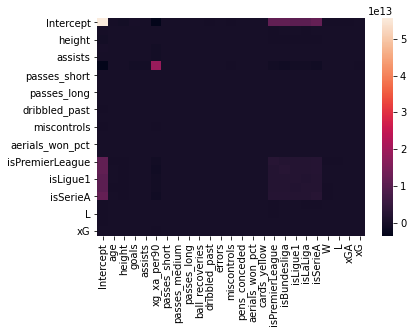

In [15]:
#correlation matrix
sm.regression.linear_model.RegressionResults.cov_params(resultsDEF)
sns.heatmap(sm.regression.linear_model.RegressionResults.cov_params(resultsDEF),annot=False,fmt='g')


In [16]:
#evaluating predictions
predictionsDEF=finalDEF1.predict(dataDEF)
DEFpredtrain=finalDEF1.predict(trainDEF)
DEFpredtest=finalDEF1.predict(testDEF)
rmsetrainDEF=sm.tools.eval_measures.rmse(trainDEF['value'],DEFpredtrain)
rmsetestDEF=sm.tools.eval_measures.rmse(testDEF['value'],DEFpredtest)
print(rmsetrainDEF,rmsetestDEF)

8304798.210491962 9278457.931528352


In [18]:
#cross validation
class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)

print(cross_val_score(SMWrapper(sm.OLS), modelDEF.exog, modelDEF.endog, scoring='neg_mean_squared_error'))

[-7.51804939e+13 -8.43733432e+13 -7.48126482e+13 -8.40120537e+13
 -5.71084008e+13]


In [19]:
#some dope plots and other stuff
#multicollinearity
np.linalg.cond(resultsDEF.model.exog)

4.4604497051630203e+18

<AxesSubplot:>

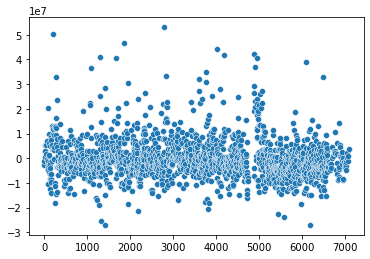

In [20]:
sns.scatterplot(data=resultsDEF.resid)

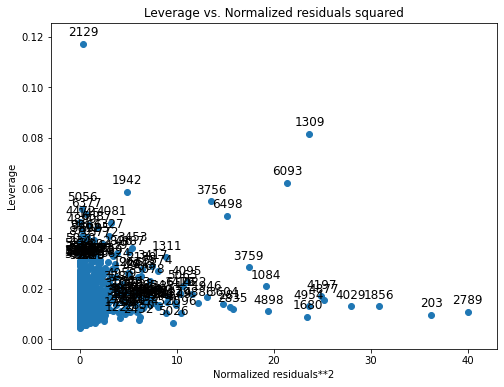

In [21]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(resultsDEF, ax = ax)

In [22]:
#Actual predictions
dataDEF['preds']=predictionsDEF
dataseason1920=dataDEF[dataDEF['Season_201920#']==1]
dataDEF.sort_values('preds',ascending=False)[0:10]

<ipython-input-22-c17c5166e46d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDEF['preds']=predictionsDEF


,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#,pctpassesshort,pctpassesmedium,pctpasseslong,pctpassescompleted,preds
3824,NaN,Aymeric Laporte,fr FRA,DF,Manchester City,24.0,1994.0,75000000.0,189.0,Defender - Centre-Back,...,1,0,0,1,0,0.000090,0.000176,0.000059,0.000302,5.379177e+07
1309,58.0,Trent Alexander-Arnold,eng ENG,DF,Liverpool,20.0,1998.0,99000000.0,180.0,Defender - Right-Back,...,1,0,0,0,1,0.000085,0.000128,0.000090,0.000226,4.981492e+07
3759,NaN,Virgil van Dijk,nl NED,DF,Liverpool,27.0,1991.0,90000000.0,193.0,Defender - Centre-Back,...,1,0,0,1,0,0.000072,0.000152,0.000069,0.000267,4.922025e+07
1311,688.0,Virgil van Dijk,nl NED,DF,Liverpool,28.0,1991.0,80000000.0,193.0,Defender - Centre-Back,...,1,0,0,0,1,0.000064,0.000153,0.000073,0.000265,4.870679e+07
5006,NaN,NicolĂˇs Otamendi,ar ARG,DF,Manchester City,29.0,1988.0,35000000.0,183.0,Defender - Centre-Back,...,1,0,1,0,0,0.000095,0.000179,0.000058,0.000308,4.546364e+07
1327,2124.0,Andrew Robertson,sco SCO,DF,Liverpool,25.0,1994.0,64000000.0,178.0,Defender - Left-Back,...,1,0,0,0,1,0.000131,0.000132,0.000050,0.000260,4.412259e+07
3756,NaN,Trent Alexander-Arnold,eng ENG,DF,Liverpool,19.0,1998.0,80000000.0,180.0,Defender - Right-Back,...,1,0,0,1,0,0.000121,0.000172,0.000103,0.000302,4.291406e+07
3772,NaN,Andrew Robertson,sco SCO,DF,Liverpool,24.0,1994.0,60000000.0,178.0,Defender - Left-Back,...,1,0,0,1,0,0.000124,0.000135,0.000047,0.000254,4.243201e+07
6175,NaN,Kyle Walker,eng ENG,DF,Manchester City,27.0,1990.0,50000000.0,183.0,Defender - Right-Back,...,1,0,1,0,0,0.000142,0.000158,0.000049,0.000308,4.237358e+07
2869,NaN,Niklas SĂĽle,de GER,DF,Bayern Munich,22.0,1995.0,60000000.0,195.0,Defender - Centre-Back,...,0,0,0,1,0,0.000083,0.000198,0.000093,0.000351,4.073540e+07
